In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import os
import json

from matplotlib import pyplot as plt
import ligo.skymap.plot
import astropy_healpix as ah
from ligo.skymap import postprocess
from astropy import units as u
from astropy.coordinates import SkyCoord


In [43]:
#tempskymap = np.loadtxt('skymap_spiirsnr_400null.txt')[:,2]

In [44]:
#tempskymap

array([ -9.440724,  -9.440724,  -9.440724, ..., 191.6002  , 191.6002  ,
       191.6002  ])

In [45]:
#np.savetxt('prob_spiir_400null.txt',tempskymap)

In [2]:
#skymap = np.loadtxt('prob_spiir_withoutnull.txt')
#skymap = np.loadtxt('prob_spiir_withnull.txt')
#skymap = np.loadtxt('prob_manoj_withoutnull.txt')
skymap = np.loadtxt('skymap/skymap_spiirsnr_40null.txt')[:,2]
#skymap = tempskymap
skymap = np.exp(skymap)
skymap /= sum(skymap)

In [4]:
npix = len(skymap)
nside = int(np.sqrt(npix/12.0))
true_de = -0.408
true_ra = 3.446
print(skymap)

[1.12811501e-210 1.12811501e-210 1.12811501e-210 ... 6.21633256e-124
 6.21633256e-124 6.21633256e-124]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


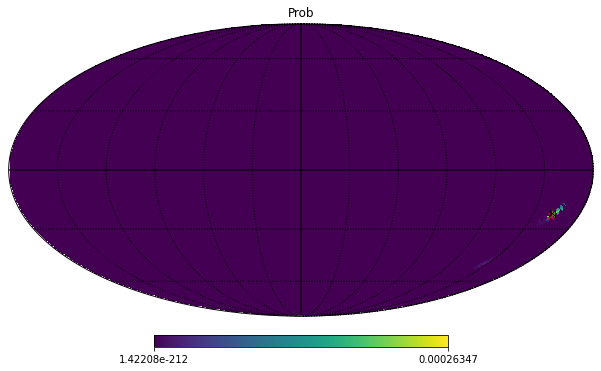

In [5]:
max_theta,max_phi = hp.pixelfunc.pix2ang(nside,np.argmax(skymap),nest=True)
projector  = hp.projector.MollweideProj()
x1,y1 = projector.ang2xy(np.array([-true_de+np.pi/2,true_ra]))  # real direction
x2,y2 = projector.ang2xy(np.array([max_theta,max_phi]))
hp.mollview(skymap,title='Prob',nest=True)
hp.graticule(coord='G',local=True)
plt.plot(x1,y1,'rx')
plt.plot(x2,y2,'kx')
plt.show()


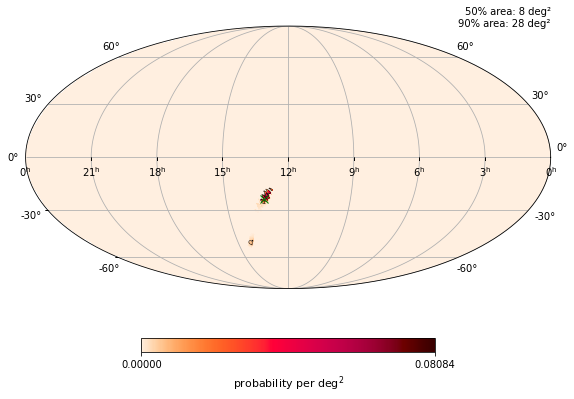

In [6]:

contour = [50,90]

#Load-skymap
#skymap=np.loadtxt('prob.txt')
nside = ah.npix_to_nside(len(skymap))

# Convert sky map from probability to probability per square degree.
deg2perpix = ah.nside_to_pixel_area(nside).to_value(u.deg**2)
probperdeg2 = skymap / deg2perpix

#Calculate contour levels
cls = 100 * postprocess.find_greedy_credible_levels(skymap)

plt.figure(figsize = (10,6))
#Initialize skymap grid
ax = plt.axes(projection='astro hours mollweide')
ax.grid()
ax.plot_coord(SkyCoord(true_ra, true_de, unit='rad'), 'x', color='green', markersize=8)

#Plot skymap with labels
vmax = probperdeg2.max()
vmin = probperdeg2.min()
img = ax.imshow_hpx(probperdeg2, cmap='cylon', nested=True, vmin=vmin, vmax=vmax)
cs = ax.contour_hpx((cls, 'ICRS'), nested=True, linewidths=0.5, levels=contour,colors='k')
v = np.linspace(vmin, vmax, 2, endpoint=True)
cb = plt.colorbar(img, orientation='horizontal', ticks=v, fraction=0.045)
cb.set_label(r'probability per deg$^2$',fontsize=11)


text=[]
pp = np.round(contour).astype(int)
ii = np.round(np.searchsorted(np.sort(cls), contour) *
                          deg2perpix).astype(int)
for i, p in zip(ii, pp):
    text.append('{:d}% area: {:,d} deg²'.format(p, i))
ax.text(1, 1, '\n'.join(text), transform=ax.transAxes, ha='right')

#plt.savefig('skymap400null.pdf')

plt.show()


# Design inj skymap

In [30]:
#skymap_inj = np.loadtxt("/Users/qianhu/Documents/USTC/2020UWA/my_Ccode/skymap/skymap_snr_multires_ID_2.txt")
skymap_inj = np.loadtxt("/Users/qianhu/Documents/USTC/2020UWA/my_Ccode/skymap2/skymap_snr_multires_ID_0.txt")

In [31]:
skymap_inj

array([[ 5.901207e+000,  0.000000e+000, -7.126397e+000,  8.700796e-317,
         6.953144e-310,  2.097532e-317],
       [ 5.901207e+000,  0.000000e+000, -7.126397e+000,  8.700796e-317,
         6.953144e-310,  2.097532e-317],
       [ 5.901207e+000,  0.000000e+000, -7.126397e+000,  8.700796e-317,
         6.953144e-310,  2.097532e-317],
       ...,
       [ 8.510047e+000,  0.000000e+000,  1.631993e+001,  8.700796e-317,
         6.953144e-310,  2.097532e-317],
       [ 8.510047e+000,  0.000000e+000,  1.631993e+001,  8.700796e-317,
         6.953144e-310,  2.097532e-317],
       [ 8.510047e+000,  0.000000e+000,  1.631993e+001,  8.700796e-317,
         6.953144e-310,  2.097532e-317]])

In [32]:
skymap_inj = skymap_inj[:,2]
skymap_inj = np.exp(skymap_inj)
skymap_inj /= sum(skymap_inj)

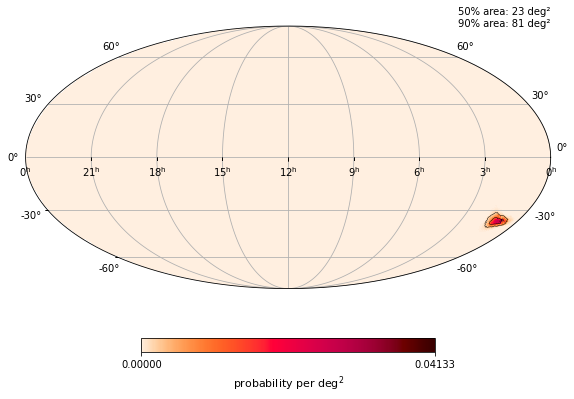

In [34]:
contour = [50,90]

#Load-skymap
#skymap=np.loadtxt('prob.txt')
nside = ah.npix_to_nside(len(skymap_inj))

# Convert sky map from probability to probability per square degree.
deg2perpix = ah.nside_to_pixel_area(nside).to_value(u.deg**2)
probperdeg2 = skymap_inj / deg2perpix

#Calculate contour levels
cls = 100 * postprocess.find_greedy_credible_levels(skymap_inj)

plt.figure(figsize = (10,6))
#Initialize skymap grid
ax = plt.axes(projection='astro hours mollweide')
ax.grid()
#ax.plot_coord(SkyCoord(true_ra, true_de, unit='rad'), 'x', color='green', markersize=8)

#Plot skymap with labels
vmax = probperdeg2.max()
vmin = probperdeg2.min()
img = ax.imshow_hpx(probperdeg2, cmap='cylon', nested=True, vmin=vmin, vmax=vmax)
cs = ax.contour_hpx((cls, 'ICRS'), nested=True, linewidths=0.5, levels=contour,colors='k')
v = np.linspace(vmin, vmax, 2, endpoint=True)
cb = plt.colorbar(img, orientation='horizontal', ticks=v, fraction=0.045)
cb.set_label(r'probability per deg$^2$',fontsize=11)


text=[]
pp = np.round(contour).astype(int)
ii = np.round(np.searchsorted(np.sort(cls), contour) *
                          deg2perpix).astype(int)
for i, p in zip(ii, pp):
    text.append('{:d}% area: {:,d} deg²'.format(p, i))
ax.text(1, 1, '\n'.join(text), transform=ax.transAxes, ha='right')

#plt.savefig('test.pdf')
plt.show()